### Installing the required Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing the data

In [51]:
df= pd.read_csv("C://Users//admin//Desktop//IITKGP//LAB//ASSIGNMENT1//adult//adult_data",header=None)

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Defining the columns name

In [53]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", 
    "marital_status", "occupation", "relationship", "race", 
    "sex", "capital_gain", "capital_loss", "hours_per_week", 
    "native_country", "income"
]

# Assign the headers to the DataFrame
df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####  Our dataset contains 32561 rows with 15 attributes.

#### Categorizing the columns into numerical and categorical columns

In [55]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


#### Printing the elements of the first row to see if there is any discrepencies

In [56]:
for value in df.iloc[0]:
    print(value)

39
 State-gov
77516
 Bachelors
13
 Never-married
 Adm-clerical
 Not-in-family
 White
 Male
2174
0
40
 United-States
 <=50K


#### so, we can see that there is an unnecessary blank space in the categorical columns elements so we will remove it.

In [57]:
df[categorical_columns]=df[categorical_columns].apply(lambda x: x.str.strip())

## Visualize attributes of the data set using suitable plots

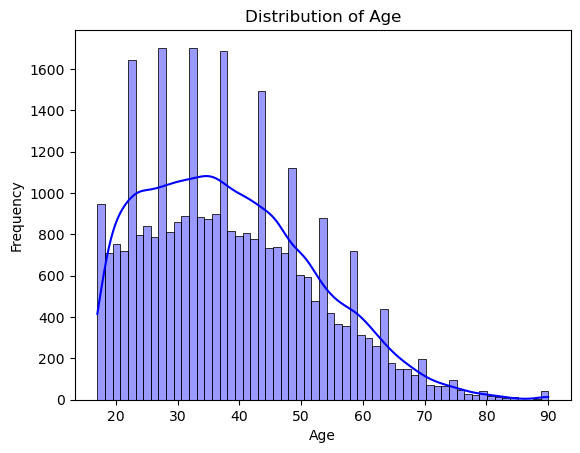

In [58]:
sns.histplot(data=df,x="age", kde=1, bins="auto", color='blue',edgecolor='black',alpha=0.4)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Adjust the layout and show the plot
plt.show()

#### From the above plot, we can see that the age distribution is positively skewed.

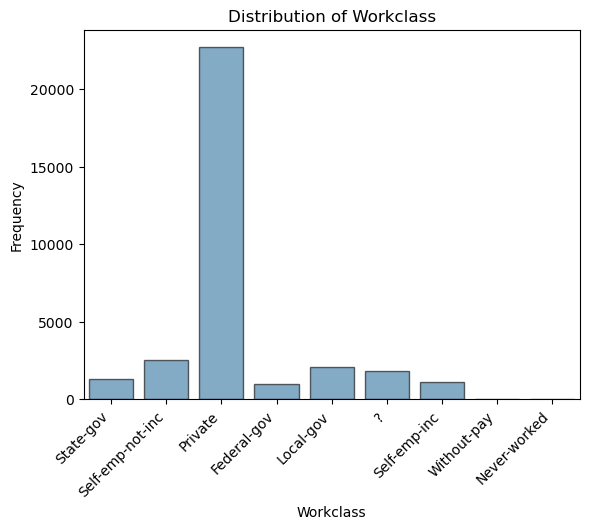

In [59]:
sns.countplot(data=df, x="workclass", edgecolor='black',alpha=0.6)

# Title and labels
plt.title("Distribution of Workclass")
plt.xlabel("Workclass")
plt.ylabel("Frequency")
plt.xticks(rotation=45,ha="right")

# Show the plot
plt.show()

#### From the above plot we can see most of the people work in Private Sector.

### Plotting the histogram for all the numerical varaibles in our dataset

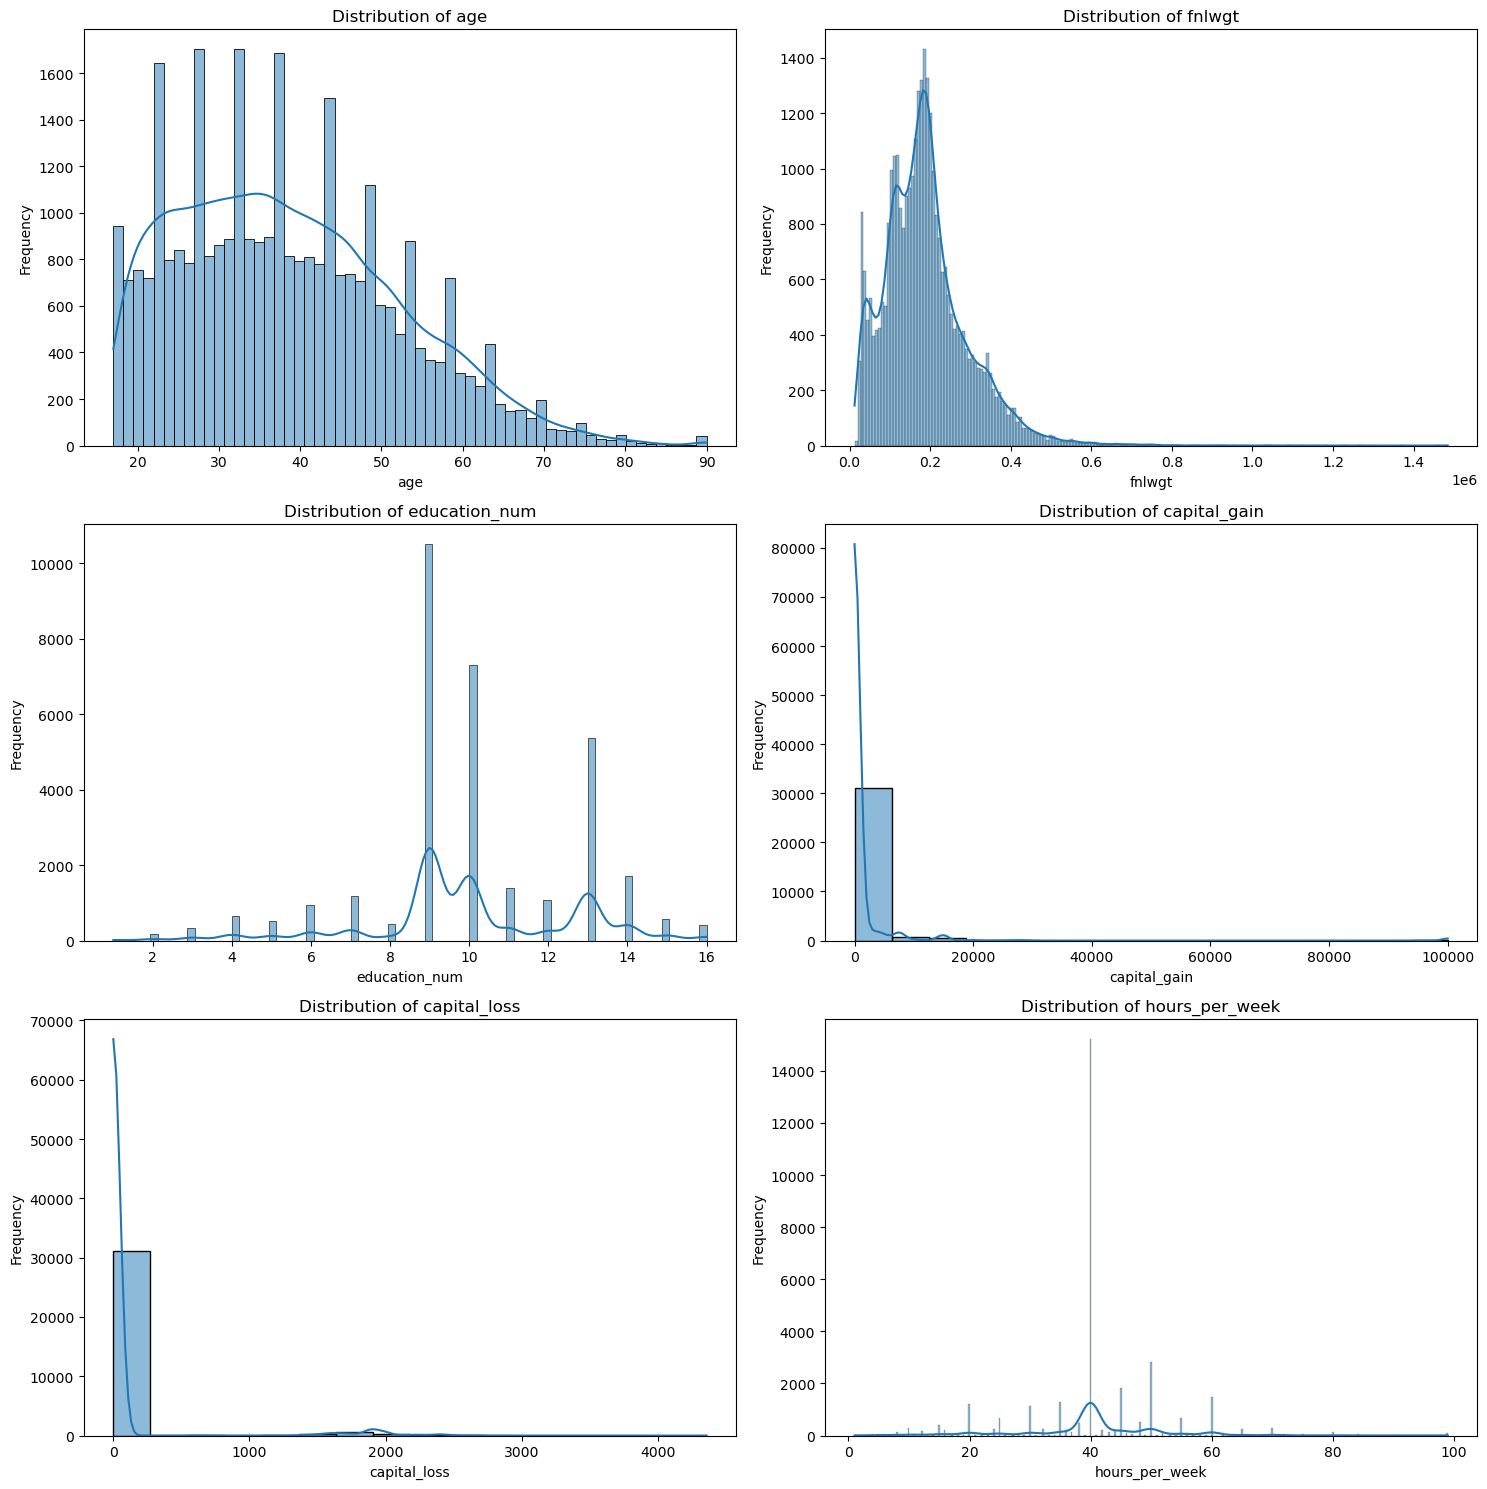

In [60]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)  # Create a grid of subplots
    sns.histplot(data=df,x=column,kde=True, bins="auto")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Plotting the countplot for all the categorical varaibles in our dataset

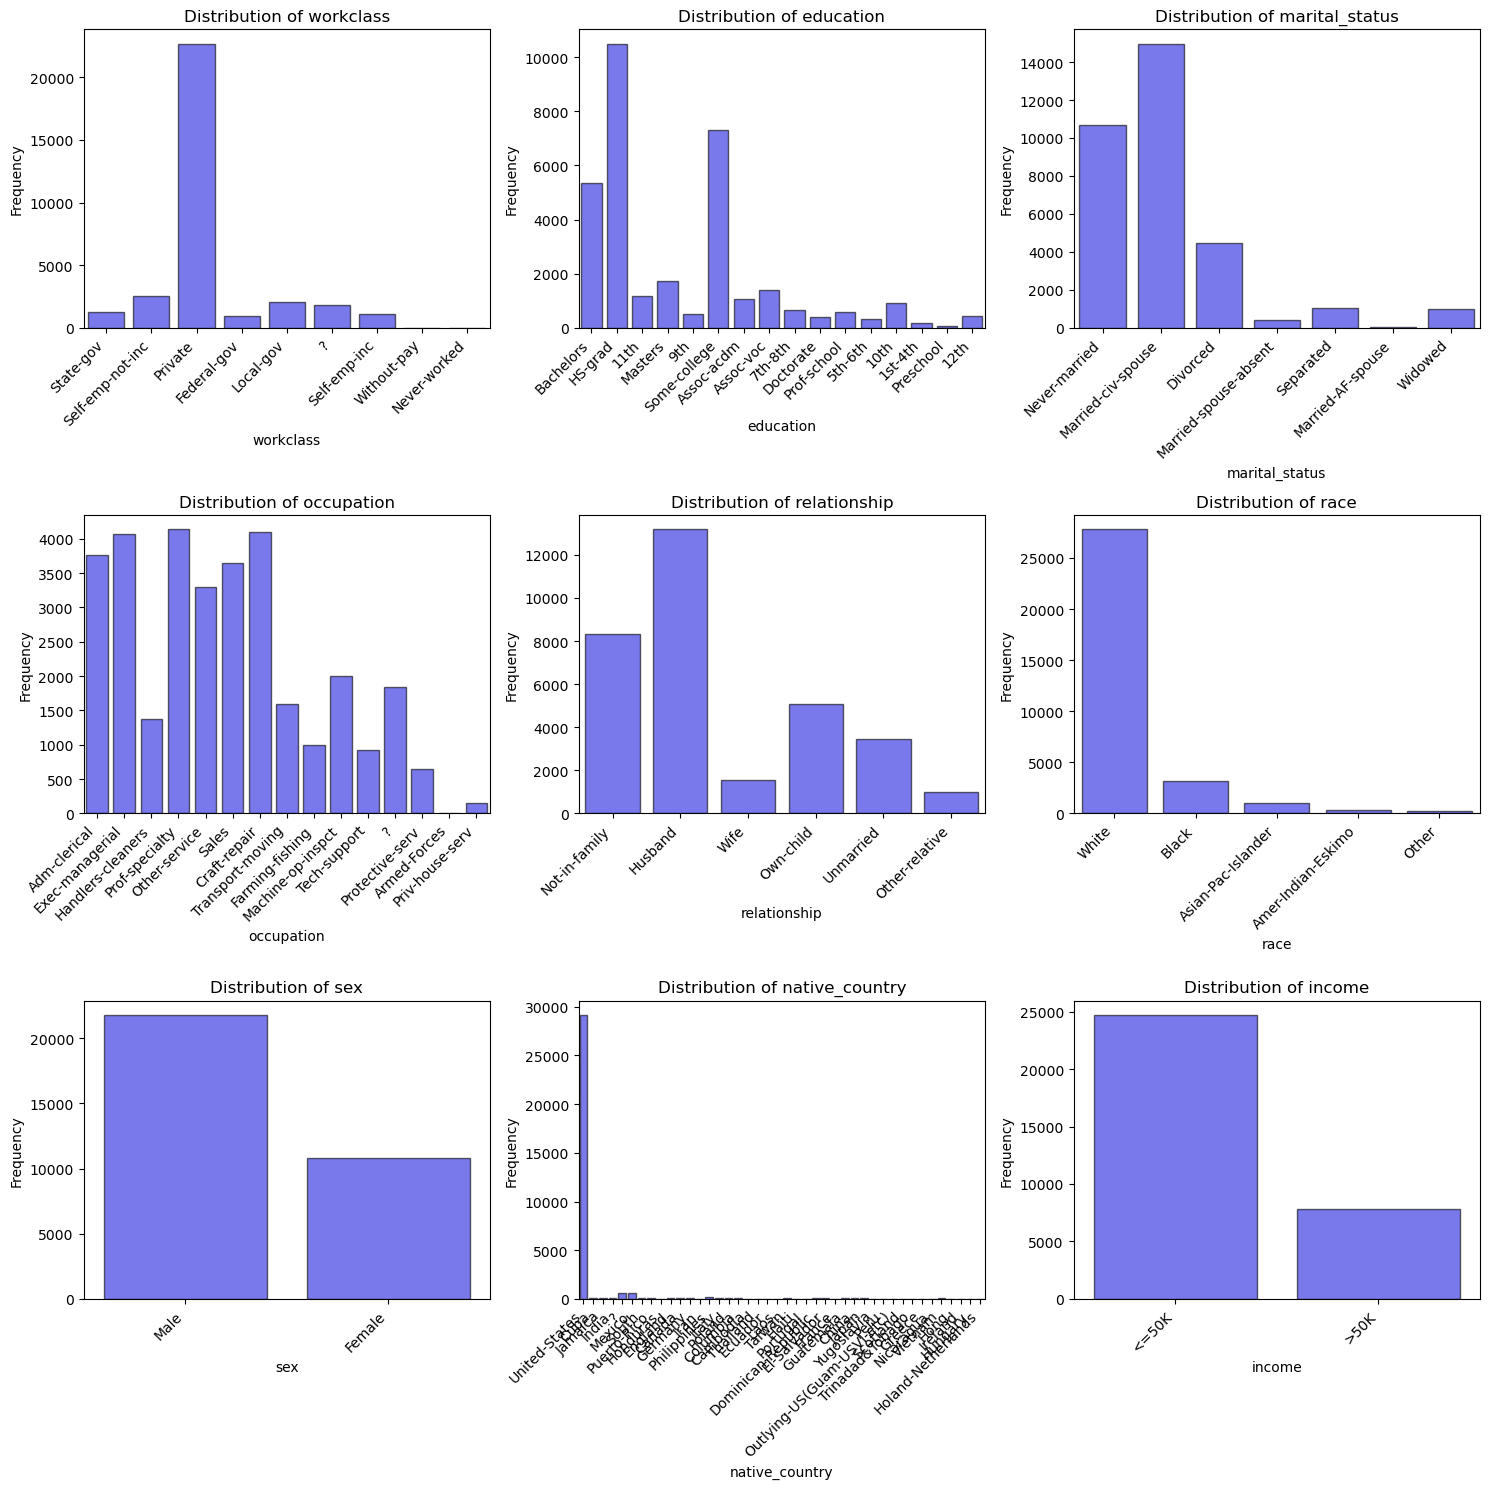

In [61]:
plt.figure(figsize=(15,15))
for i,column in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(df, x=column,color='blue', edgecolor='black',alpha=0.6)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45,ha="right")

plt.tight_layout()
plt.show()

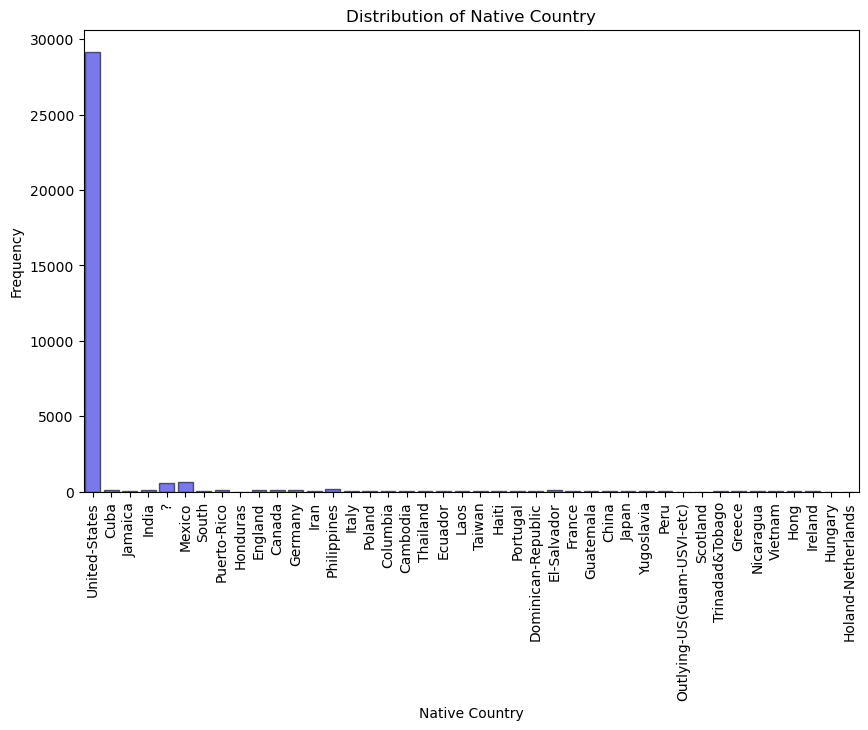

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(df, x="native_country",color='blue', edgecolor='black',alpha=0.6)

# Title and labels
plt.title("Distribution of Native Country")
plt.xlabel("Native Country")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### From the above plot, we can see almost all the people (~90%) are from United states

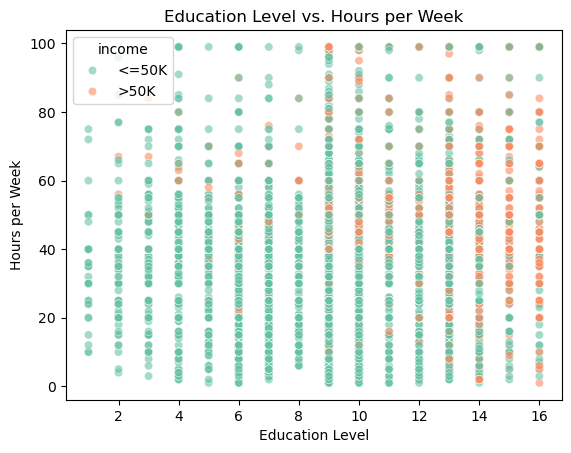

In [63]:
# Scatter Plots: Exploring relationships between numerical attributes

# Scatter plot: Education_num vs. Hours per Week
sns.scatterplot(data=df, x="education_num", y="hours_per_week", alpha=0.6, hue="income", palette="Set2")
plt.title("Education Level vs. Hours per Week")
plt.xlabel("Education Level")
plt.ylabel("Hours per Week")
plt.show()


#### From the above plot, it can be seen that more people with education level 9-10 are working more than 80 hours in a week.

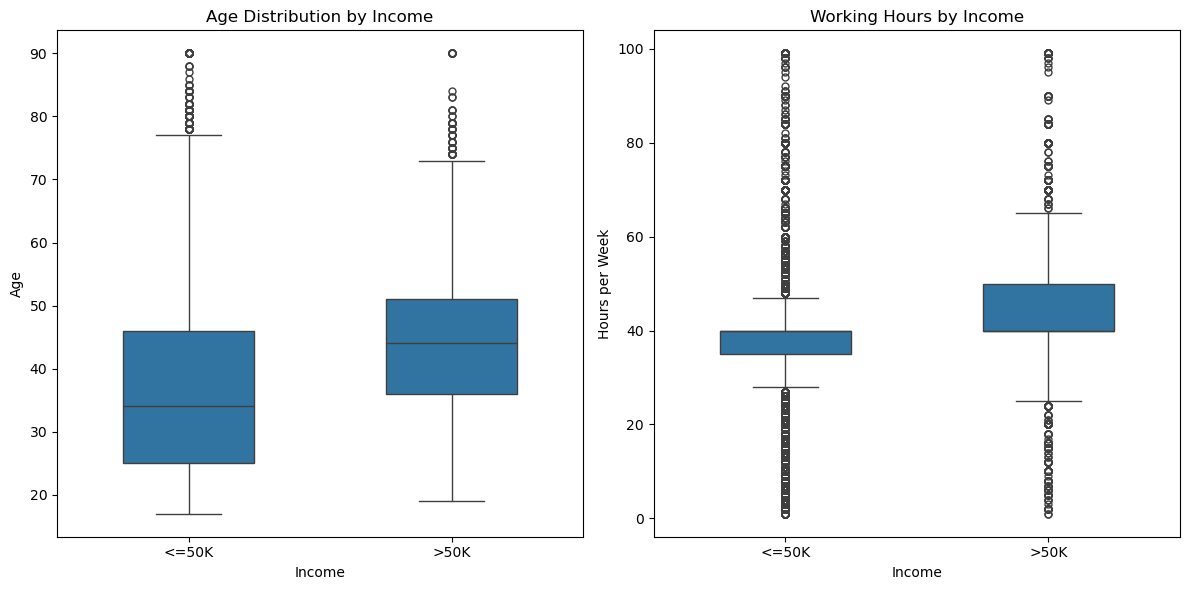

In [64]:
# Box Plots: Distribution of numerical attributes grouped by categorical attributes
plt.figure(figsize=(12, 6))

# Box plot: Age vs. Income
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="income", y="age",width=0.5,fliersize=5)
plt.title("Age Distribution by Income")
plt.xlabel("Income")
plt.ylabel("Age")

# Box plot: Hours per Week vs. Income
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="income", y="hours_per_week",width=0.5,fliersize=5)
plt.title("Working Hours by Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")

plt.tight_layout()
plt.show()


#### From the Box plot, We can see that people with higher income than 50K, are comparatively older than people 
#### with income less than 50k and also working hour per week is higher for these people.

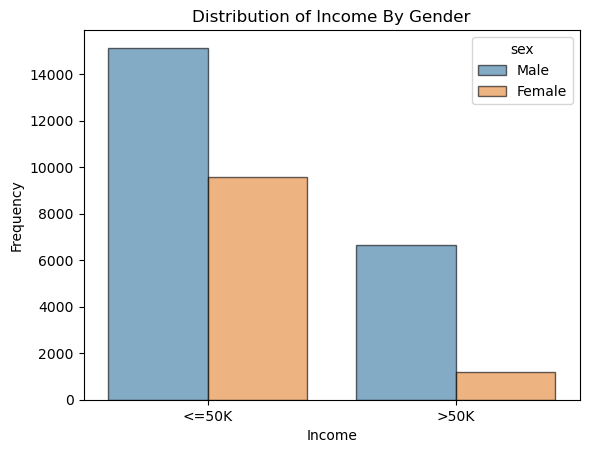

In [65]:
# Count plots: Distribution of Income by Gender
sns.countplot(df, x="income",hue="sex", edgecolor='black',alpha=0.6)

# Title and labels
plt.title("Distribution of Income By Gender")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Show the plot
plt.show()

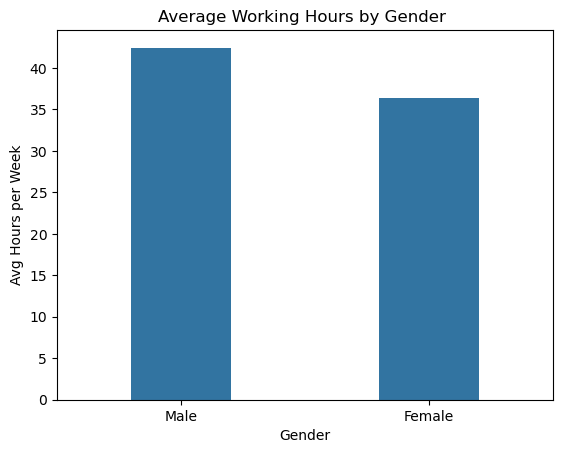

In [66]:
# Bar Plots: Distribution of Average Working Hours by Gender
sns.barplot(data=df, x="sex", y="hours_per_week",estimator="mean",width=0.4,errorbar=None)

# Title and labels
plt.title("Average Working Hours by Gender ")
plt.xlabel("Gender")
plt.ylabel("Avg Hours per Week")

# Show the plot
plt.show()

#### This shows that on average a Male employe works for ~42 hours per week while a Female employee works for ~ 36 hrs a week

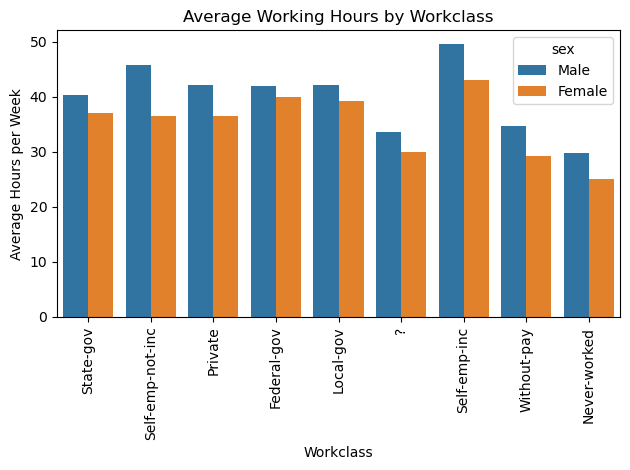

In [67]:
# Average hours per week by workclass
sns.barplot(data=df, x="workclass", y="hours_per_week", hue="sex",errorbar=None)
plt.title("Average Working Hours by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Average Hours per Week")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


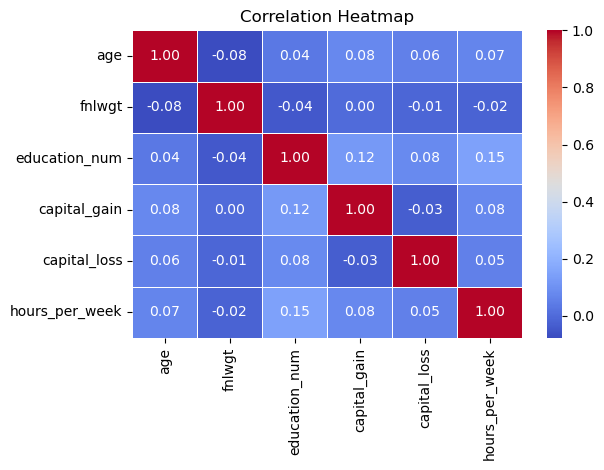

In [68]:
# Correlation heatmap for numerical columns
corr = df[["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


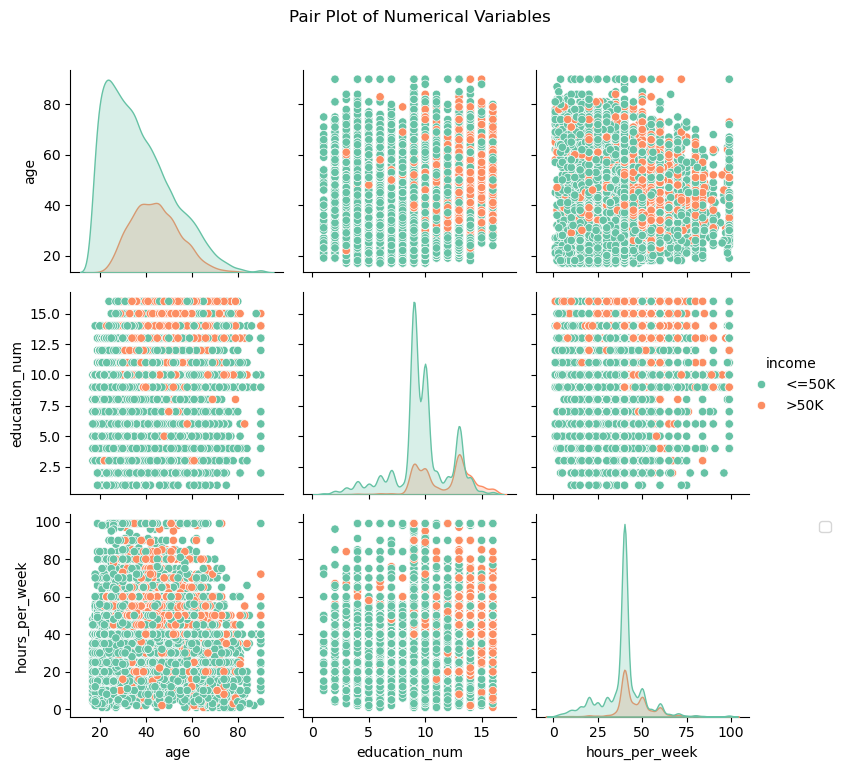

In [69]:
# Pair-plots between numerical variables 
sns.pairplot(data=df, vars=["age", "education_num", "hours_per_week"], hue="income", palette="Set2")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left',frameon=True)

# Title and show plot
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

### Distribution of Occupation by Gender

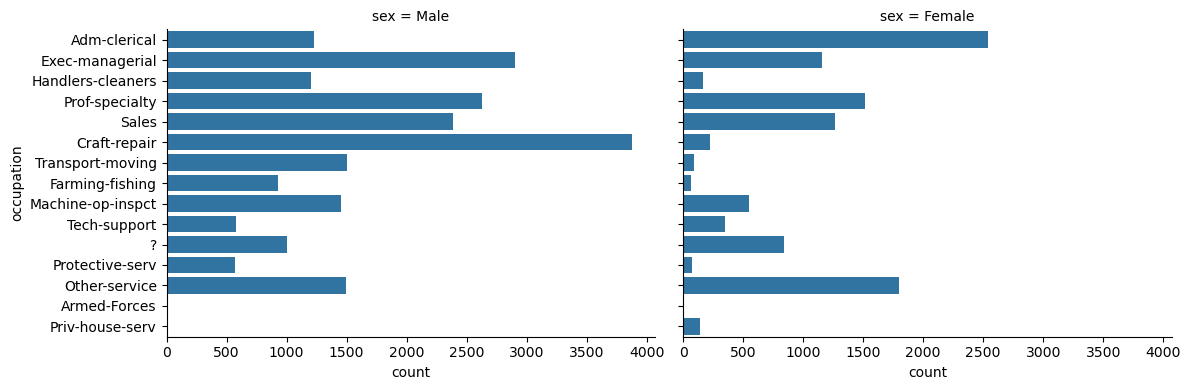

In [70]:
# Distribution of Occupation by Gender and comparison using FacetGrid
g = sns.FacetGrid(data=df, col="sex", height=4, aspect=1.5)
g.map_dataframe(sns.countplot,y="occupation")

#### The above plot clearly shows the stark difference in the occupation of male and female employees.
#### Eg. for Adm-Clerical jobs there are more females than males while for craft-repair jobs there are more males than females.

In [71]:
# Create a crosstab to count occurrences of 'workclass' for different Occupations
crosstab = pd.crosstab(df['occupation'], df['workclass'])
crosstab

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
occupation,,,,,,,,,
?,1836,0,0,7,0,0,0,0,0
Adm-clerical,0,317,283,0,2833,31,50,253,3
Armed-Forces,0,9,0,0,0,0,0,0,0
Craft-repair,0,64,146,0,3195,106,531,56,1
Exec-managerial,0,180,214,0,2691,400,392,189,0
Farming-fishing,0,8,29,0,455,51,430,15,6
Handlers-cleaners,0,23,47,0,1273,2,15,9,1
Machine-op-inspct,0,14,12,0,1913,13,36,13,1
Other-service,0,35,193,0,2740,27,175,124,1


### Distribution of Occupation by Workclass

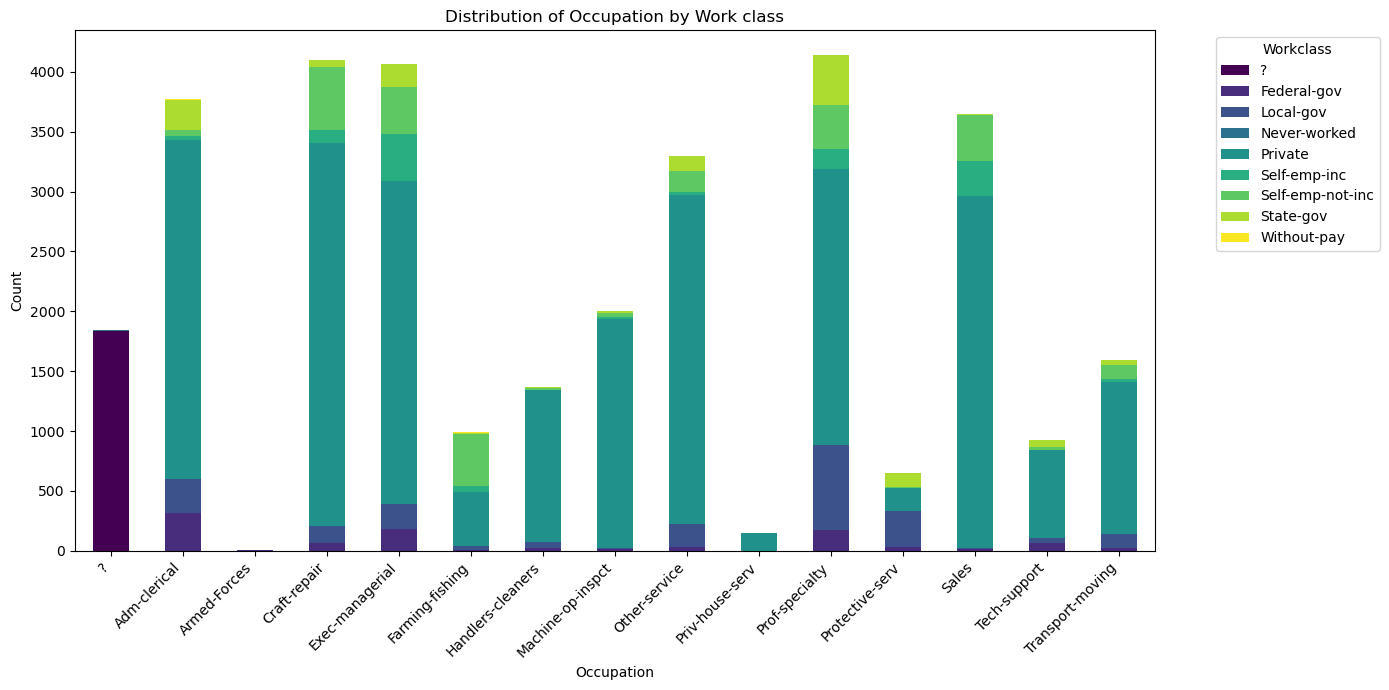

In [72]:
# Plot a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

plt.title('Distribution of Occupation by Work class')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Step 2: Identifying Missing Values & Noise

In [73]:
(df=="?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

### Changing the ? in Native_country column with the most frequent country

In [74]:
native_country_mode = df['native_country'].mode()[0]
df["native_country"] = df["native_country"].replace("?",native_country_mode)

In [75]:
(df=="?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [76]:
# Group by 'native_country' & 'education' and then find the most frequent 'workclass' for each pair

workclass_mode_CE = df[df["workclass"] !="?"].groupby(by=['native_country','education']).workclass.apply(lambda x: x.mode()[0])
workclass_mode_CE

native_country  education   
Cambodia        12th                     Private
                1st-4th                  Private
                7th-8th                  Private
                Bachelors                Private
                HS-grad                  Private
                                      ...       
Yugoslavia      Assoc-acdm               Private
                Assoc-voc       Self-emp-not-inc
                Bachelors                Private
                HS-grad                  Private
                Some-college             Private
Name: workclass, Length: 417, dtype: object

### Replacing ? in the workclass column with the most frequent workclass type based on the country and education level

In [77]:
df["workclass"] = df.apply(lambda row: workclass_mode_CE.get((row["native_country"],row["education"]),default=row["workclass"])
                                       if row["workclass"] == "?" else row["workclass"]
                                       ,axis=1) 

In [78]:
(df=="?").sum()

age                  0
workclass           10
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [79]:
df[df["workclass"]=="?"]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7663,17,?,659273,11th,7,Never-married,?,Own-child,Black,Female,0,0,40,Trinadad&Tobago,<=50K
9626,52,?,115209,Prof-school,15,Married-spouse-absent,?,Unmarried,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
14672,41,?,217921,9th,5,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,0,0,40,Hong,<=50K
15310,19,?,109938,11th,7,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,0,0,40,Laos,<=50K
15580,42,?,167678,11th,7,Married-civ-spouse,?,Husband,White,Male,0,0,22,Ecuador,<=50K
15584,33,?,160776,Assoc-voc,11,Divorced,?,Not-in-family,White,Female,0,0,40,France,<=50K
16103,69,?,248248,1st-4th,2,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,34,Philippines,<=50K
19561,29,?,256211,1st-4th,2,Never-married,?,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
20396,41,?,77937,12th,8,Divorced,?,Not-in-family,White,Female,0,0,40,Canada,<=50K
24054,62,?,223447,12th,8,Divorced,?,Not-in-family,White,Male,0,0,40,Canada,<=50K


In [80]:
# Replacing the remaining ? in workclass column with the most frequent workclass based only on the Country.

workclass_mode_C = df.groupby(by="native_country").workclass.apply(lambda x: x.mode()[0])
df["workclass"] = df.apply(lambda row: workclass_mode_C.loc[row["native_country"]]
                                       if row["workclass"]=="?" else row["workclass"]
                                       ,axis=1) 

In [81]:
(df=="?").sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

### Replacing the Value in Occupation Column with NOT APPLICABLE if the person has never worked before. 

In [82]:
df["occupation"] =  df["occupation"].mask(df["workclass"]=="Never-worked","NOT APPLICABLE")

In [83]:
(df=="?").sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [84]:
# Group by 'native_country' & 'workclass' and then find the most frequent 'occupation' for each pair

occupation_mode_CW = df[df["occupation"] != "?"].groupby(by=["native_country","workclass"]).occupation.apply(lambda x: x.mode()[0])
occupation_mode_CW

native_country  workclass       
Cambodia        Federal-gov         Exec-managerial
                Private                Craft-repair
                Self-emp-not-inc    Farming-fishing
Canada          Federal-gov            Adm-clerical
                Local-gov            Prof-specialty
                                         ...       
Vietnam         State-gov              Adm-clerical
Yugoslavia      Local-gov             Other-service
                Private             Exec-managerial
                Self-emp-inc        Exec-managerial
                Self-emp-not-inc       Craft-repair
Name: occupation, Length: 191, dtype: object

### Replacing ? in the Occupation column with the most frequent Occupation type based on the country and workclass

In [85]:

df["occupation"] = df.apply(lambda row: occupation_mode_CW.get((row["native_country"],row["workclass"]),default=row["occupation"])
                            if row["occupation"]=="?" else row["occupation"]
                           ,axis=1)

In [86]:
(df=="?").sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [87]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## So In this way, we have eliminated all the missing data and the noise from our datatset.